In [1]:
#import library and data

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import matplotlib.animation as animation

data = pd.read_excel('../input/tng-valuation/TNG.xlsx', index_col = 'Date')
index = pd.read_excel('../input/tng-valuation/VNINDEX.xlsx', index_col = 'Date')
bond = pd.read_excel('../input/tng-valuation/Vietnam 10-Year Bond Yield Historical Data.xlsx', index_col = 'Date')

In [2]:
# transform index column to the same data type

bond.index = pd.to_datetime(bond.index, format = '%b %d, %Y')
bond.index = bond.index.strftime('%Y-%m-%d')

data.index = pd.to_datetime(data.index, format = '%Y-%m-%d')
data.index = data.index.strftime('%Y-%m-%d')

index.index = pd.to_datetime(index.index, format = '%Y-%m-%d')
index.index = index.index.strftime('%Y-%m-%d')

In [3]:
# Sort bond yield data chronologically
bond_sorted = bond.sort_index()

In [4]:
index

,Close,Open,High,Low,Vol,% Change
Date,,,,,,
2018-01-02,995.77,986.05,996.18,984.34,186.02K,0.0117
2018-01-03,1005.67,999.86,1010.21,998.41,237.30K,0.0099
2018-01-04,1019.75,1009.37,1019.75,1009.00,252.91K,0.0140
2018-01-05,1012.65,1020.34,1020.60,1010.65,284.03K,-0.0070
2018-01-08,1022.90,1011.36,1022.90,1004.89,268.79K,0.0101
...,...,...,...,...,...,...
2022-09-26,1174.35,1203.28,1203.28,1159.12,757.09K,-0.0240
2022-09-27,1166.54,1174.35,1180.75,1166.44,466.62K,-0.0067
2022-09-28,1143.62,1166.54,1166.54,1142.79,527.70K,-0.0196


In [5]:
# Drop 1-1-2018 because the other two datasets do not contain information on this day. And for compatibility.

bond_adj = bond_sorted.drop(bond_sorted.index[0])

print(bond_adj)

            Price
Date             
2018-01-02  5.049
2018-01-03  5.047
2018-01-04  5.085
2018-01-05  5.106
2018-01-08  5.105
...           ...
2022-09-26  4.667
2022-09-27  4.874
2022-09-28  5.025
2022-09-29  4.975
2022-09-30  5.016

[1240 rows x 1 columns]


In [6]:
# Joining VNINDEX data and Bond data, this dataframe is called Premium.

index_final = index.drop(columns= ['Open','High','Low','Vol','% Change'])

Premium = pd.DataFrame(index_final).join(bond_adj, how ='left')

print(Premium)
print(Premium.dtypes)

              Close  Price
Date                      
2018-01-02   995.77  5.049
2018-01-03  1005.67  5.047
2018-01-04  1019.75  5.085
2018-01-05  1012.65  5.106
2018-01-08  1022.90  5.105
...             ...    ...
2022-09-26  1174.35  4.667
2022-09-27  1166.54  4.874
2022-09-28  1143.62  5.025
2022-09-29  1126.07  4.975
2022-09-30  1113.44  5.016

[1185 rows x 2 columns]
Close    float64
Price    float64
dtype: object


In [7]:
#Joining TNG data and bond data, this dataframe is called Returns_arfr.

data_final = data.drop(columns= ['Open','High','Low','Vol','% change'])

Returns_rfr = pd.DataFrame(data_final).join(bond_adj, how ='left',lsuffix = '_overlap')
Returns_arfr = Returns_rfr.dropna()
print(Returns_arfr)


            Closing_Price  Price
Date                            
2018-01-02         6923.5  5.049
2018-01-03         6725.6  5.047
2018-01-04         7022.4  5.085
2018-01-05         6972.9  5.106
2018-01-08         6972.9  5.105
...                   ...    ...
2022-09-26        21700.0  4.667
2022-09-27        21900.0  4.874
2022-09-28        21600.0  5.025
2022-09-29        20000.0  4.975
2022-09-30        19300.0  5.016

[1185 rows x 2 columns]


In [8]:
#Calculating daily returns for TNG, VNINDEX, Treasury note

data_returns = np.log(Returns_arfr['Closing_Price']/Returns_arfr['Closing_Price'].shift(1))
index_returns = np.log(Premium['Close']/Premium['Close'].shift(1))
bond_returns = np.log(Premium['Price']/Premium['Price'].shift(1))

data_returns



Date
2018-01-02         NaN
2018-01-03   -0.029000
2018-01-04    0.043184
2018-01-05   -0.007074
2018-01-08    0.000000
                ...   
2022-09-26   -0.066840
2022-09-27    0.009174
2022-09-28   -0.013793
2022-09-29   -0.076961
2022-09-30   -0.035627
Name: Closing_Price, Length: 1185, dtype: float64

In [9]:
#Drop na

TNG = data_returns.dropna(how = any)
VNINDEX = index_returns.dropna(how = any)

Rfr = bond_returns.dropna(how = any)
TNG

Date
2018-01-03   -0.029000
2018-01-04    0.043184
2018-01-05   -0.007074
2018-01-08    0.000000
2018-01-09    0.048456
                ...   
2022-09-26   -0.066840
2022-09-27    0.009174
2022-09-28   -0.013793
2022-09-29   -0.076961
2022-09-30   -0.035627
Name: Closing_Price, Length: 1184, dtype: float64

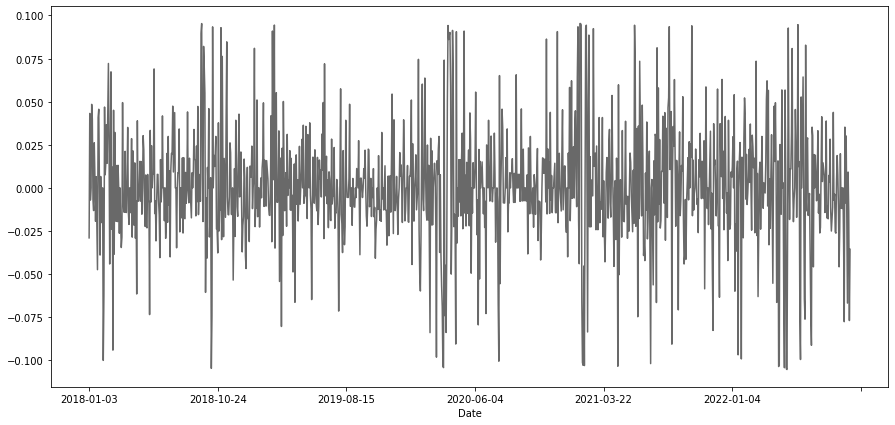

In [10]:
TNG.plot(figsize=(15,7), color = 'dimgray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

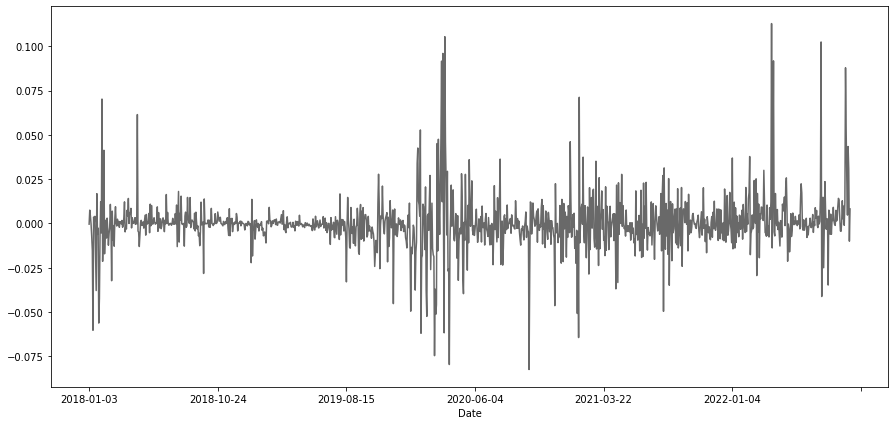

In [11]:
Rfr.plot(figsize=(15,7), x = 'Date',color = 'dimgray')
plt.show

In [12]:
# CAPM => r = RFR + Beta*Risk premium
# Beta = 1.24
# Risk Premium (Aswath Damodaran) = 7.8%
Rrfr = ((Premium['Price'].mean() + 1) / (0.018 + 1)) - 1
R = Rrfr + (1.24 * 0.078)


In [13]:
# 10-year T-bond coupon rate (4Y average)

Premium['Price'].mean()

3.481254852320675

In [14]:
# Cost of Equity

TNG_returns = print (str(round(R, 4)) + '%')

3.4987%


In [15]:
# Risk free rate

Riskfree = print (str(round(Rrfr, 4)) + '%')

3.402%


In [16]:
# Assign value for regression
# Y = b1*X1 + error
X = TNG - Rfr
Y = VNINDEX - Rfr

<function matplotlib.pyplot.show(close=None, block=None)>

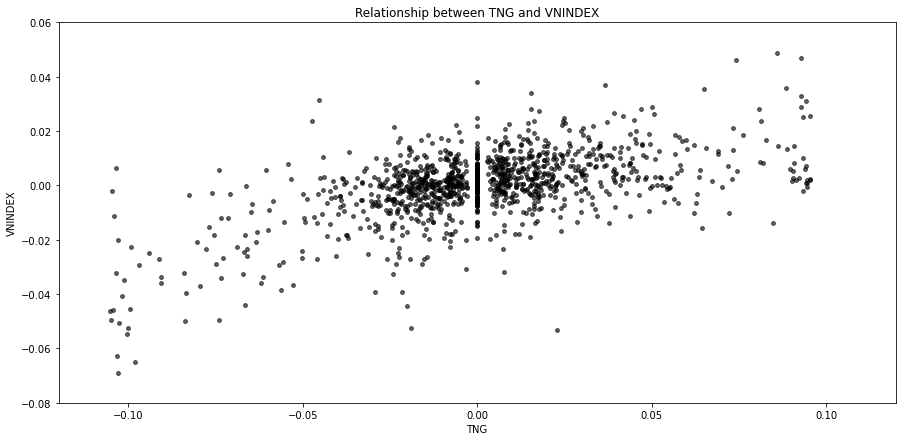

In [17]:
#Scatter Plot, TNG & VNINDEX
plt.figure(figsize = (15,7))
plt.scatter(TNG,VNINDEX,s = 15, c = 'k', alpha = 0.6)
plt.axis([-0.12, 0.12, -0.08, 0.06])
plt.ylabel('VNINDEX')
plt.xlabel('TNG')
plt.title('Relationship between TNG and VNINDEX')
plt.show

In [18]:
#Assign independent and dependent variables for regression
# y = B0 + B1*x1

X1 = sm.add_constant(Y)
reg = sm.OLS(X,X1).fit()


In [19]:
print (reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1052.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          1.55e-165
Time:                        02:44:52   Log-Likelihood:                 2561.7
No. Observations:                1184   AIC:                            -5119.
Df Residuals:                    1182   BIC:                            -5109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.924      0.3

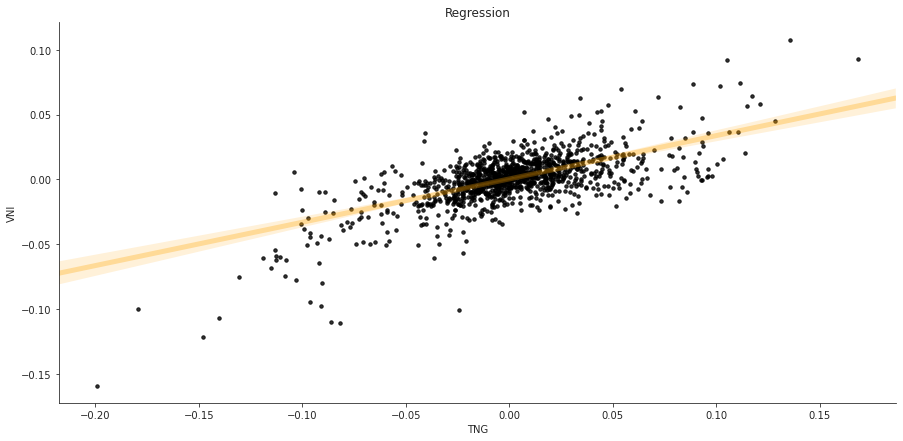

In [20]:
#Regression
plt.figure(figsize = (15,7))
sns.set_context(font_scale = -1)
with sns.axes_style("ticks"):
    
    Plot = sns.regplot(x = X, y = Y, robust = True, color = 'k', 
                       truncate = False, 
                       line_kws ={'lw':5,'alpha':0.3,'color':'orange'},
                       scatter_kws={'s':12,'alpha':0.8})
sns.despine() 
plt.xlabel('TNG')
plt.ylabel('VNI')
plt.title('Regression')
plt.show()

# plt.savefig('/Users/ad/Downloads/Valuation.jpg',bbox_inches='tight', dpi=300)

In [21]:
# Monte Carlo simulation, billion vnd
rev_m =  2161
rev_stdev =  1080
iterations = 2000

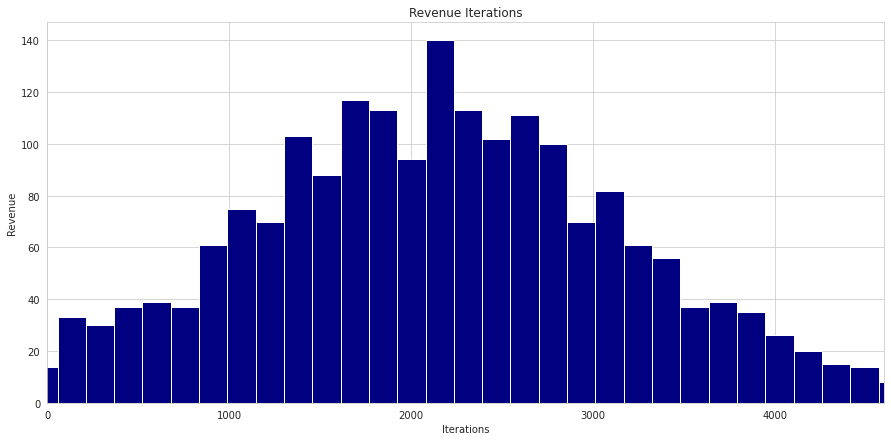

In [22]:
#Revenue iterations
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev_adj = [n for n in rev if n > 0]
plt.figure(figsize = (15,7))
with sns.axes_style("whitegrid"):
    GP = plt.hist( rev,50, color ='navy')
plt.ylabel('Revenue')
plt.xlabel('Iterations')
plt.title('Revenue Iterations')
plt.xlim(0,4600)
plt.grid(True)
plt.show()

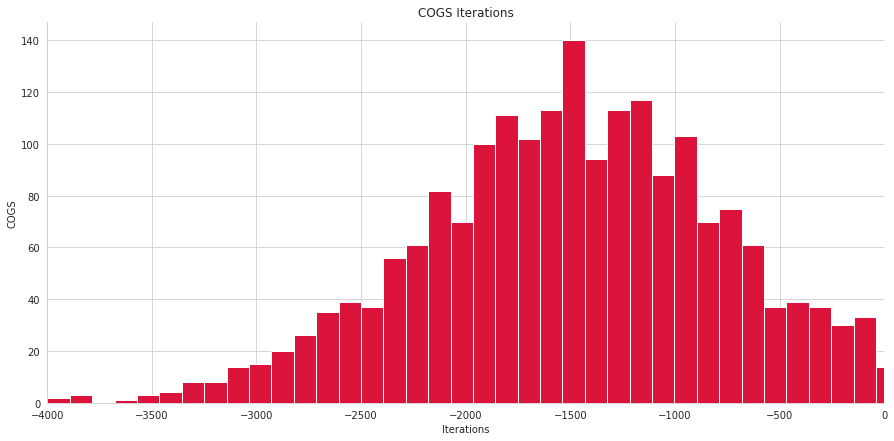

In [23]:
#COGS iterations

COGS = - (rev * np.random.normal(0.832,0.166))
COGS_adj = [n for n in COGS if n < 0]
plt.figure(figsize = (15,7))
with sns.axes_style("whitegrid"):
    GP = plt.hist( COGS,50, color = 'crimson')
sns.despine()
plt.ylabel('COGS')
plt.xlabel('Iterations')
plt.title('COGS Iterations')
plt.xlim(-4000, 0)
plt.grid(True)
plt.show()

In [24]:
Gross_profit = rev + COGS
Gross_profit

array([ 118.00233586,  708.40167342,  740.87444663, ...,  885.00631382,
       1018.28743931,  697.92891692])

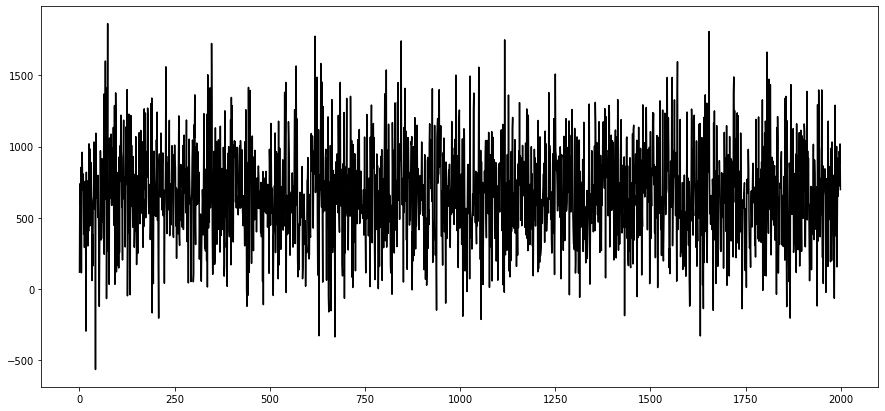

In [25]:
plt.figure(figsize = (15,7))
plt.plot(Gross_profit, color ='k')
plt.show()

In [26]:
max(Gross_profit)

1863.1514298879865

In [27]:
min(Gross_profit)

-565.1150493283349

In [28]:
Gross_profit.std()

342.00272107208383

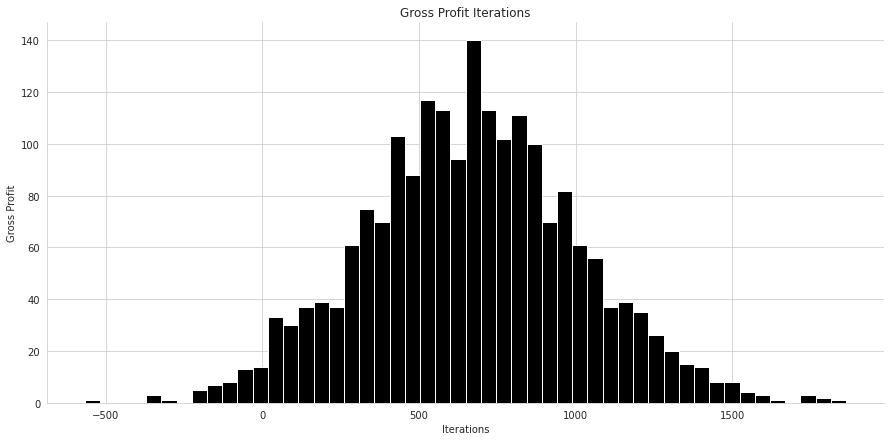

In [29]:
#Gross Profit iterations

plt.figure(figsize = (15,7))

with sns.axes_style("whitegrid"):
    GP = plt.hist( Gross_profit, 50, color = 'k', label ='Gross Profit')
sns.despine()
plt.ylabel('Gross Profit')
plt.xlabel('Iterations')
plt.title('Gross Profit Iterations')
plt.grid(True)
plt.show()
 